In [133]:
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install np


In [134]:
import pandas as pd

#  llegim el fitxer CSV 
df = pd.read_csv('2017_tramer_mapa_estrategic_soroll_bcn.csv')
# mostrem les primeres fileres del DataFrame
df.head()


,TRAM,TOTAL_D,TOTAL_E,TOTAL_N,TOTAL_DEN,TRANSIT_D,TRANSIT_E,TRANSIT_N,TRANSIT_DEN,GI_TR_D,...,INDUST_D,INDUST_E,INDUST_N,INDUST_DEN,VIANANTS_D,VIANANTS_E,OCI_N,PATIS_D,PATIS_E,GEOM_WKT
0,T04719W,70 - 75 dB(A),65 - 70 dB(A),60 - 65 dB(A),70 - 75 dB(A),70 - 75 dB(A),65 - 70 dB(A),60 - 65 dB(A),70 - 75 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((430229.788593716 4586585.199...
1,T19941Z,45 - 50 dB(A),45 - 50 dB(A),< 40 dB(A),45 - 50 dB(A),40 - 45 dB(A),40 - 45 dB(A),< 40 dB(A),45 - 50 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),45 - 50 dB(A),45 - 50 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((432928.898296899 4584019.987...
2,T18111R,55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),55 - 60 dB(A),55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),55 - 60 dB(A),40 - 45 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((429953.263102905 4588161.440...
3,T03222Y,60 - 65 dB(A),55 - 60 dB(A),60 - 65 dB(A),65 - 70 dB(A),60 - 65 dB(A),55 - 60 dB(A),50 - 55 dB(A),60 - 65 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),50 - 55 dB(A),50 - 55 dB(A),60 - 65 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((427949.038250661 4580946.042...
4,T17625I,55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),60 - 65 dB(A),55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),60 - 65 dB(A),55 - 60 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((433950.188943519 4585741.213...


## Explciació dels camps del Dataframe
Les dades que es mostren contenen el tram **TRAM** de carrer i els nivells sonors de diferents tipus de fonts sonores i també el nivell de soroll global (la suma de totes les fonts). El tipus de font sonora el podem classificar en dos grups.

> Fonts sonores demanades per normativa:
- Soroll de trànsit viari. **TRANSIT**
- Soroll de grans infraestructures viàries. **GI**
- Soroll de trànsit ferroviari i tramvia. **FFCC**
- Soroll industrial. **INDUST**

> Fonts sonores addicionals, que són de rellevància a la ciutat:
- Soroll en carrers de vianants. **VIANANTS**
- Soroll d’oci i aglomeració de persones. **OCI** **PATIS**

> A més cadascun d'ells s'indiquen per nivells sonors mitjans anuals per a cada període horari. Així doncs:

- Ld és el nivell sonor mitjà anual pel període de dia (7-21h). **D**
- Le és el nivell sonor mitjà anual pel període de vespre (21-23h). **E**
- Ln és el nivell sonor mitjà anual pel període de nit (23-7h). **N**


A més, hi ha un quart índex acústic, el ponderat dia-vespre-nit (Lden), que correspon a una mitjana ponderada dels índexs Ld, Le i Ln, penalitzant els períodes vespre i nit.

L’índex Lden no esta inclòs als mapes de dades ambientals ja que l’Ordenança de Medi Ambient de la ciutat no l’utilitza. No obstant, degut a que és un paràmetre exigit per normativa europea, es poden baixar els mapes d’aquest índex acústic a la pagina web d’Open Data BCN.

In [135]:
# Mida del dataframe, files i nombre de camps
df.shape


(17958, 27)

In [136]:
# Mostrem un resum del mateix
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17958 entries, 0 to 17957
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TRAM         17958 non-null  object
 1   TOTAL_D      17958 non-null  object
 2   TOTAL_E      17958 non-null  object
 3   TOTAL_N      17958 non-null  object
 4   TOTAL_DEN    17958 non-null  object
 5   TRANSIT_D    17958 non-null  object
 6   TRANSIT_E    17958 non-null  object
 7   TRANSIT_N    17958 non-null  object
 8   TRANSIT_DEN  17958 non-null  object
 9   GI_TR_D      17958 non-null  object
 10  GI_TR_E      17958 non-null  object
 11  GI_TR_N      17958 non-null  object
 12  GI_TR_DEN    17958 non-null  object
 13  FFCC_D       17958 non-null  object
 14  FFCC_E       17958 non-null  object
 15  FFCC_N       17958 non-null  object
 16  FFCC_DEN     17958 non-null  object
 17  INDUST_D     17958 non-null  object
 18  INDUST_E     17958 non-null  object
 19  INDUST_N     17958 non-nu

In [137]:
# Mostrem alguns estadístics del DataFrame
df.describe()

,TRAM,TOTAL_D,TOTAL_E,TOTAL_N,TOTAL_DEN,TRANSIT_D,TRANSIT_E,TRANSIT_N,TRANSIT_DEN,GI_TR_D,...,INDUST_D,INDUST_E,INDUST_N,INDUST_DEN,VIANANTS_D,VIANANTS_E,OCI_N,PATIS_D,PATIS_E,GEOM_WKT
count,17958,17958,17958,17958,17958,17958,17958,17958,17958,17958,...,17958,17958,17958,17958,17958,17958,17958,17958,17958,17958
unique,17958,9,8,7,9,9,8,7,9,9,...,6,6,6,7,6,6,7,4,3,17958
top,P28659,60 - 65 dB(A),55 - 60 dB(A),55 - 60 dB(A),60 - 65 dB(A),60 - 65 dB(A),55 - 60 dB(A),50 - 55 dB(A),60 - 65 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),"MULTILINESTRING ((428842.519 4587255.013,42883..."
freq,1,3895,3847,3641,3936,3555,3590,3608,3617,9561,...,17485,17752,17750,17572,14913,15186,16270,17440,17725,1


## Preprocessament de les dades: 
Comencem per la Neteja de les dades (tractament de valors perduts, eliminació de duplicats,tractament de les dades categoriques).

In [138]:
# verifiquem els valors que son NA
df = df.dropna()


In [139]:
# Idemtifiquem les files duplicades i les eliminem
df = df.drop_duplicates()


In [140]:
# conversió de les dades categòriques, totes les columnes 
# Mirem quants intervals de DB hi ha
df

,TRAM,TOTAL_D,TOTAL_E,TOTAL_N,TOTAL_DEN,TRANSIT_D,TRANSIT_E,TRANSIT_N,TRANSIT_DEN,GI_TR_D,...,INDUST_D,INDUST_E,INDUST_N,INDUST_DEN,VIANANTS_D,VIANANTS_E,OCI_N,PATIS_D,PATIS_E,GEOM_WKT
0,T04719W,70 - 75 dB(A),65 - 70 dB(A),60 - 65 dB(A),70 - 75 dB(A),70 - 75 dB(A),65 - 70 dB(A),60 - 65 dB(A),70 - 75 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((430229.788593716 4586585.199...
1,T19941Z,45 - 50 dB(A),45 - 50 dB(A),< 40 dB(A),45 - 50 dB(A),40 - 45 dB(A),40 - 45 dB(A),< 40 dB(A),45 - 50 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),45 - 50 dB(A),45 - 50 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((432928.898296899 4584019.987...
2,T18111R,55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),55 - 60 dB(A),55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),55 - 60 dB(A),40 - 45 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((429953.263102905 4588161.440...
3,T03222Y,60 - 65 dB(A),55 - 60 dB(A),60 - 65 dB(A),65 - 70 dB(A),60 - 65 dB(A),55 - 60 dB(A),50 - 55 dB(A),60 - 65 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),50 - 55 dB(A),50 - 55 dB(A),60 - 65 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((427949.038250661 4580946.042...
4,T17625I,55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),60 - 65 dB(A),55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),60 - 65 dB(A),55 - 60 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((433950.188943519 4585741.213...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17953,T08868Y,55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),55 - 60 dB(A),55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),55 - 60 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((431756.999149255 4585026.456...
17954,P98700,50 - 55 dB(A),40 - 45 dB(A),< 40 dB(A),50 - 55 dB(A),40 - 45 dB(A),40 - 45 dB(A),< 40 dB(A),40 - 45 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),50 - 55 dB(A),< 40 dB(A),"MULTILINESTRING ((433540.3279 4587660.4522,433..."
17955,P98690,40 - 45 dB(A),< 40 dB(A),< 40 dB(A),40 - 45 dB(A),40 - 45 dB(A),< 40 dB(A),< 40 dB(A),40 - 45 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),"MULTILINESTRING ((433545.366 4587658.255,43354..."
17956,P27312,50 - 55 dB(A),40 - 45 dB(A),< 40 dB(A),50 - 55 dB(A),40 - 45 dB(A),40 - 45 dB(A),< 40 dB(A),40 - 45 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),50 - 55 dB(A),< 40 dB(A),"MULTILINESTRING ((430555.994 4585460.656,43055..."


In [141]:
columns = ["TOTAL_D","TOTAL_E","TOTAL_N","TOTAL_DEN","TRANSIT_D","TRANSIT_E","TRANSIT_N","TRANSIT_DEN","GI_TR_D","GI_TR_E","GI_TR_N","GI_TR_DEN","FFCC_D","FFCC_E","FFCC_N","FFCC_DEN","INDUST_D","INDUST_E","INDUST_N","INDUST_DEN","VIANANTS_D","VIANANTS_E","OCI_N","PATIS_D","PATIS_E"]

for col in columns:
    df[col] = df[col].replace('< 40 dB(A)', '0 - 40 dB(A)')

In [142]:
import np
cat = np.unique(df['TOTAL_D'])
cat

array(['0 - 40 dB(A)', '40 - 45 dB(A)', '45 - 50 dB(A)', '50 - 55 dB(A)',
       '55 - 60 dB(A)', '60 - 65 dB(A)', '65 - 70 dB(A)', '70 - 75 dB(A)',
       '75 - 80 dB(A)'], dtype=object)

In [143]:
from sklearn.preprocessing import LabelEncoder

columnes = ["TOTAL_D","TOTAL_E","TOTAL_N","TOTAL_DEN","TRANSIT_D","TRANSIT_E","TRANSIT_N","TRANSIT_DEN","GI_TR_D","GI_TR_E","GI_TR_N","GI_TR_DEN","FFCC_D","FFCC_E","FFCC_N","FFCC_DEN","INDUST_D","INDUST_E","INDUST_N","INDUST_DEN","VIANANTS_D","VIANANTS_E","OCI_N","PATIS_D","PATIS_E"]

# Inicialitzem el LabelEncoder
le = LabelEncoder()
# transformen categoriques a codi 
le.fit(cat)

equivalences = {label: index for index, label in enumerate(le.classes_)}
equivalences

{'0 - 40 dB(A)': 0,
 '40 - 45 dB(A)': 1,
 '45 - 50 dB(A)': 2,
 '50 - 55 dB(A)': 3,
 '55 - 60 dB(A)': 4,
 '60 - 65 dB(A)': 5,
 '65 - 70 dB(A)': 6,
 '70 - 75 dB(A)': 7,
 '75 - 80 dB(A)': 8}

In [144]:
for col in columnes:
    # Transforma la columna utilitzant l’LabelEncoder ajustat i afegeix-la al DataFrame 
    df[col + '_codis'] = le.transform(df[col])


In [145]:
df_codis = df.filter(regex='_codis$')
df_codis = pd.concat([df['TRAM'], df_codis], axis=1)
df_codis


,TRAM,TOTAL_D_codis,TOTAL_E_codis,TOTAL_N_codis,TOTAL_DEN_codis,TRANSIT_D_codis,TRANSIT_E_codis,TRANSIT_N_codis,TRANSIT_DEN_codis,GI_TR_D_codis,...,FFCC_DEN_codis,INDUST_D_codis,INDUST_E_codis,INDUST_N_codis,INDUST_DEN_codis,VIANANTS_D_codis,VIANANTS_E_codis,OCI_N_codis,PATIS_D_codis,PATIS_E_codis
0,T04719W,7,6,5,7,7,6,5,7,0,...,0,0,0,0,0,0,0,0,0,0
1,T19941Z,2,2,0,2,1,1,0,2,0,...,0,0,0,0,0,2,2,0,0,0
2,T18111R,4,4,3,4,4,4,3,4,1,...,0,0,0,0,0,0,0,0,0,0
3,T03222Y,5,4,5,6,5,4,3,5,0,...,0,0,0,0,0,3,3,5,0,0
4,T17625I,4,4,3,5,4,4,3,5,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17953,T08868Y,4,4,3,4,4,4,3,4,0,...,0,0,0,0,0,0,0,0,0,0
17954,P98700,3,1,0,3,1,1,0,1,0,...,0,0,0,0,0,0,0,0,3,0
17955,P98690,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17956,P27312,3,1,0,3,1,1,0,1,0,...,0,0,0,0,0,0,0,0,3,0


 
En aquest apartat fem la normalització de les dades (escalat de les característiques perquè tinguin rangs similars) i possiblement la reducció de la dimensionalitat si el conjunt de dades té un gran nombre de característiques.

In [146]:
#mostrem una descripció estadística de les dades
df_codis.describe()

,TOTAL_D_codis,TOTAL_E_codis,TOTAL_N_codis,TOTAL_DEN_codis,TRANSIT_D_codis,TRANSIT_E_codis,TRANSIT_N_codis,TRANSIT_DEN_codis,GI_TR_D_codis,GI_TR_E_codis,...,FFCC_DEN_codis,INDUST_D_codis,INDUST_E_codis,INDUST_N_codis,INDUST_DEN_codis,VIANANTS_D_codis,VIANANTS_E_codis,OCI_N_codis,PATIS_D_codis,PATIS_E_codis
count,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,...,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000,17958.000000
mean,4.262947,3.901659,2.914356,4.580187,4.111538,3.767402,2.794966,4.403775,1.493763,1.325816,...,0.142833,0.059194,0.029068,0.029291,0.061588,0.366299,0.315347,0.288117,0.107417,0.058581
std,1.783585,1.796867,1.773596,1.795250,1.896903,1.881040,1.773985,1.896398,2.165210,2.057110,...,0.658841,0.409695,0.305399,0.306833,0.468646,0.912881,0.848336,0.995990,0.638458,0.514119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,3.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,5.000000,4.000000,6.000000,6.000000,5.000000,4.000000,6.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,7.000000,6.000000,8.000000,8.000000,7.000000,6.000000,8.000000,8.000000,7.000000,...,6.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000


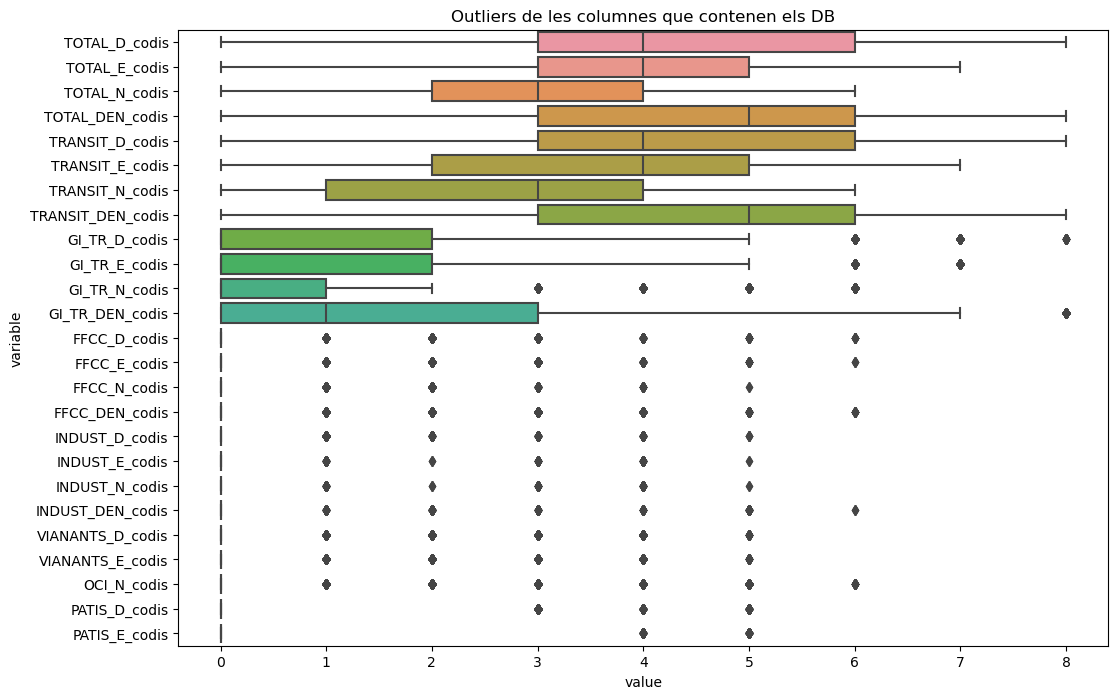

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to long-form
df_codis_long = df_codis.melt()

# Filter the DataFrame to include only columns that end with '_codis'
df_codis_long = df_codis_long[df_codis_long['variable'].str.endswith('_codis')]

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='value', y='variable', data=df_codis_long)
plt.title('Outliers de les columnes que contenen els DB')
plt.show()

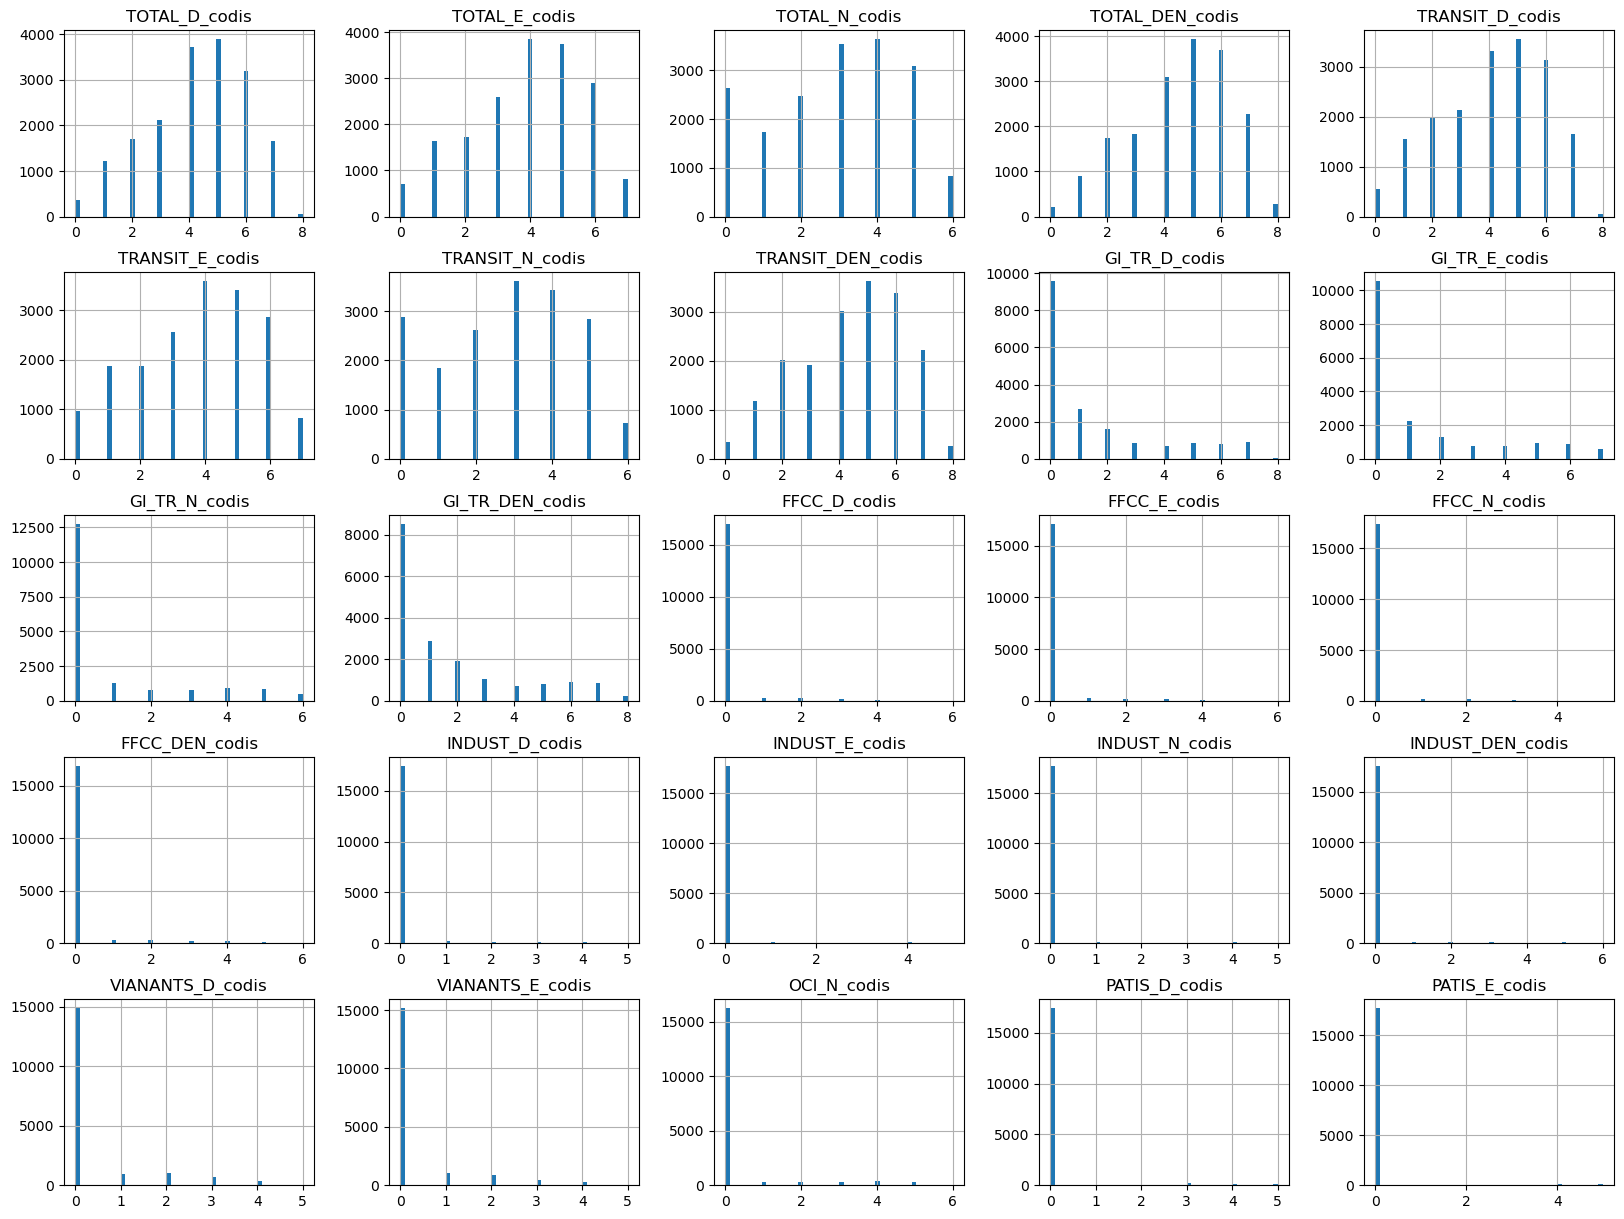

In [148]:
# mostramos también las normales
df_codis.hist(bins=50, figsize=(20,15))
plt.show()

In [153]:
# Select columns that end with 'codis'
codis_columns = [col for col in df_codis.columns if col.endswith('codis')]

# Calculate IQR for each selected column
Q1 = df_codis[codis_columns].quantile(0.25)
Q3 = df_codis[codis_columns].quantile(0.75)
IQR = Q3 - Q1

# Define a filter for values within 1.5*IQR of Q1 and Q3
filter = (df_codis[codis_columns] >= (Q1 - 1.5 * IQR)) & (df_codis[codis_columns] <= (Q3 + 1.5 * IQR))

# Apply the filter to the selected columns of df_codis
df_codis_no_outliers = df_codis.copy()
df_codis_no_outliers[codis_columns] = df_codis[codis_columns][filter]
df_codis_no_outliers.dropna(inplace=True)

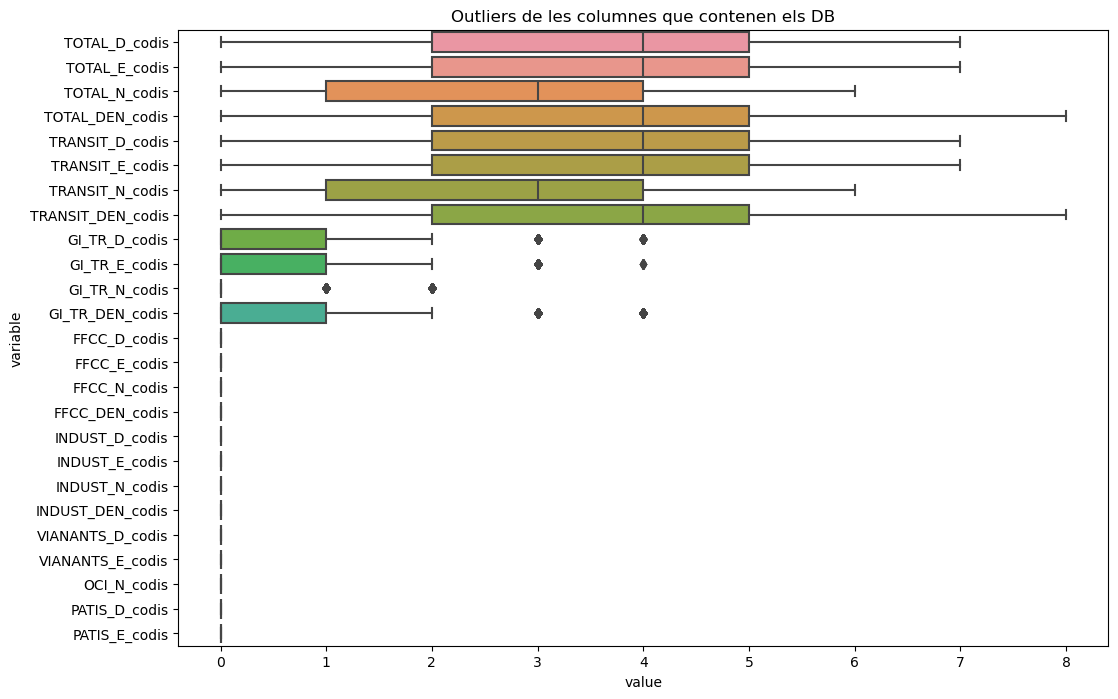

In [154]:
# Melt the DataFrame to long-form
df_codis_long = df_codis_no_outliers.melt()

# Filter the DataFrame to include only columns that end with '_codis'
df_codis_long = df_codis_long[df_codis_long['variable'].str.endswith('_codis')]

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='value', y='variable', data=df_codis_long)
plt.title('Outliers de les columnes que contenen els DB')
plt.show()

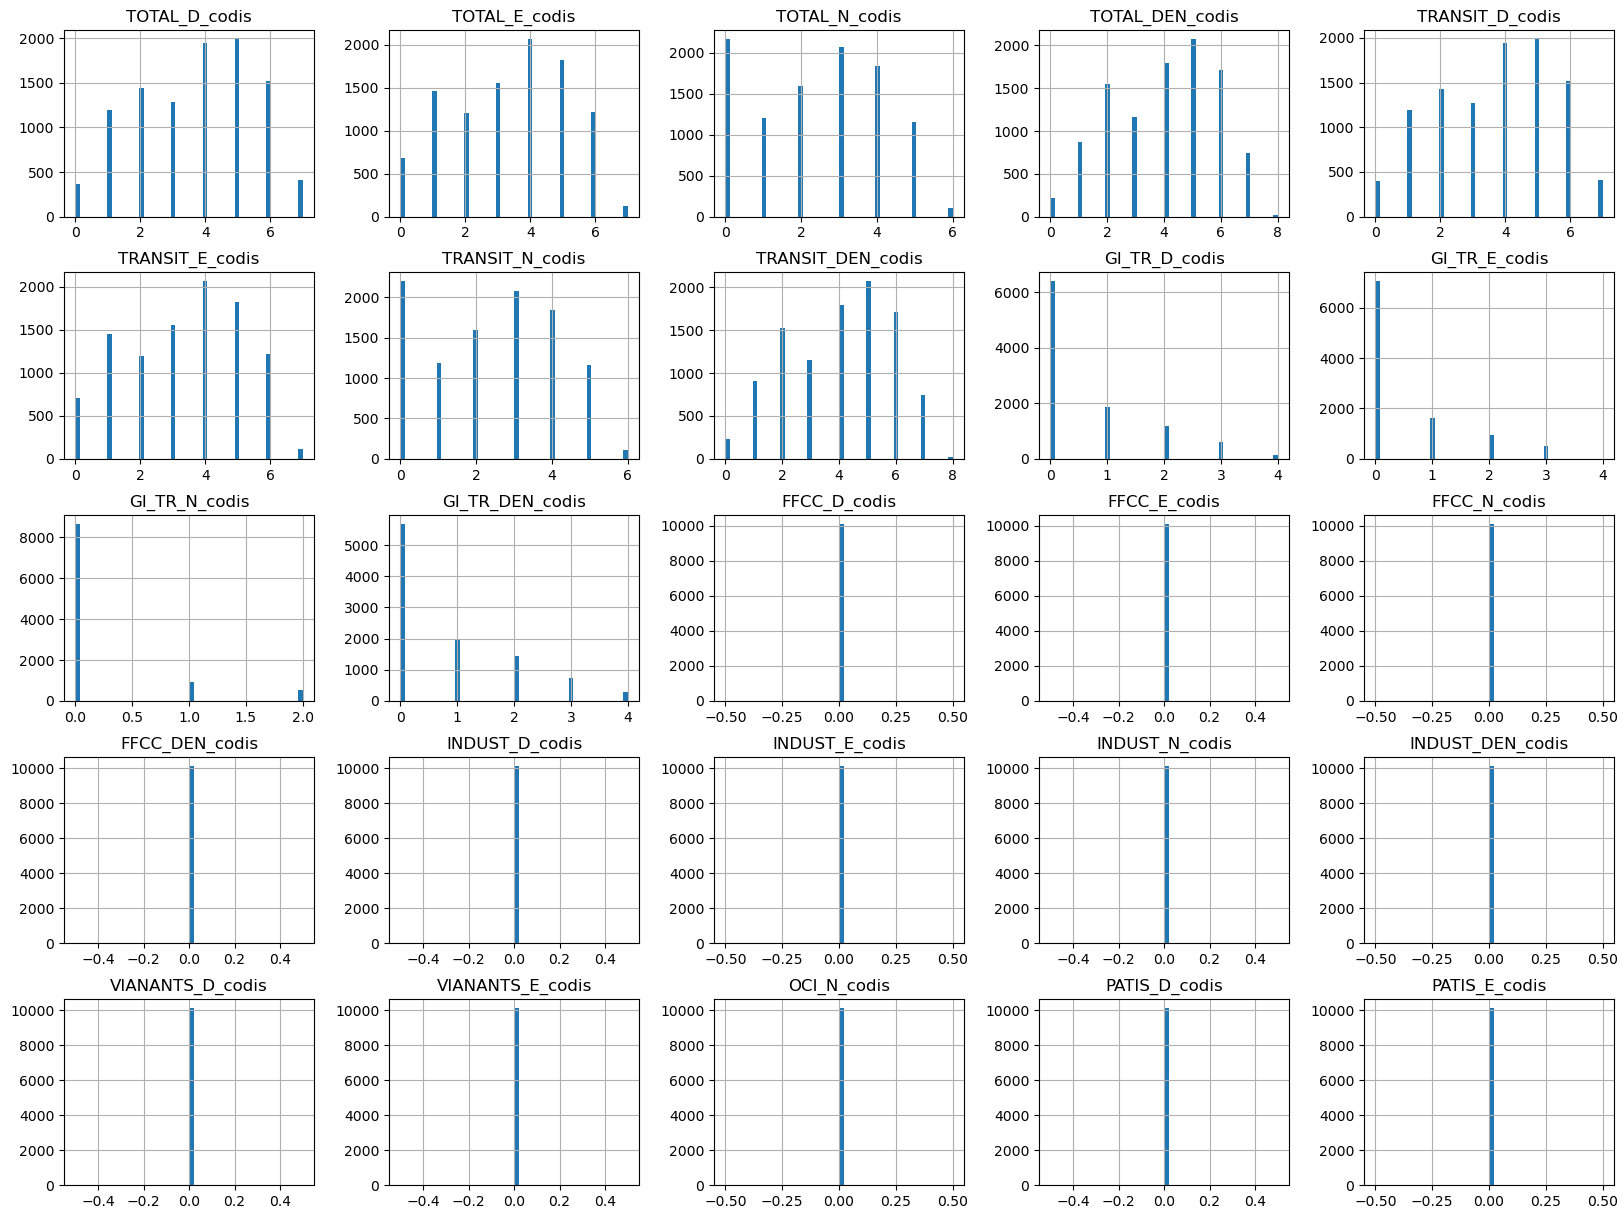

In [155]:
# mostramos también las normales
df_codis_no_outliers.hist(bins=50, figsize=(20,15))
plt.show()